# Project 7:  Statistical Analysis and Hypothesis Testing

#Packages and setup


In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#Reading data and initial processing

In [5]:
#Read data using pandas
user_df=pd.read_csv("C:/Users/Sai Deepshikha/Downloads/cookie_cats.csv")

#Check data types of each column using "dtypes" function
print("Data types for the data set:")
user_df.dtypes

#Check dimension of data i.e. # of rows and #column using pandas "shape" funtion
print("Shape of the data i.e. no. of rows and columns")
user_df.shape

#display first 5 rows of the data using "head" function
print("First 5 rows of the raw data:")
user_df.head()



Data types for the data set:


userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

Shape of the data i.e. no. of rows and columns


(90189, 5)

First 5 rows of the raw data:


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


# Detect and resolve problems in the data (Missing value, Outliers, etc.)


In [6]:
#Check for any missing values in the data using isnull() function
user_df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [ ]:
#=> Identify outliers

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

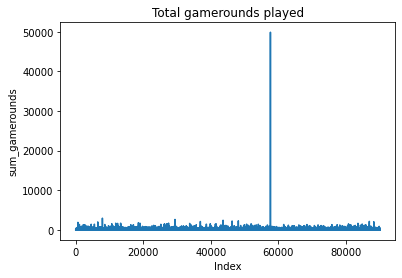

In [7]:
#Check for outlier values in sum_gamerounds column
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

In [8]:
#Based on the plot, filter out the outlier from sum_gamerounds played; Use max() fucntion to find the index of the outlier

print("Maxm value of sum_gamerounds")
max_value = max(user_df.sum_gamerounds)
max_value

print("Index of the max value")
index_value = user_df[user_df.sum_gamerounds.isin([max_value])].index.tolist()
index_value

# remove the row by index

user_df.drop(user_df.index[index_value], inplace = True)

user_df

Maxm value of sum_gamerounds


49854

Index of the max value


[57702]

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


Text(0.5, 1.0, 'Total rounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

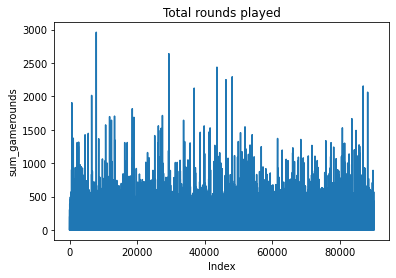

In [10]:
# Plot the graph for sum_gamerounds player after removing the outlier
plt.title("Total rounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

# Plot summary statistics and identify trends to answer basis business questions


# Overall 7-day retention rate of the game


In [11]:
#Insert calculation for 7-day retention rate

retention_rate_7 = round((user_df.retention_7.sum()/user_df.shape[0])*100,2)

print("Overall 7 days retention rate of the game for both versions is: ", retention_rate_7,"%")

Overall 7 days retention rate of the game for both versions is:  18.61 %


# No of player, who never played the game after installation

In [12]:
# Find number of customers with sum_gamerounds is equal to zero

user_df[user_df.sum_gamerounds == 0].shape[0]

3994

# Does the number of users decreases as the level progresses highlighting the difficulty of the game?

Text(0.5, 0, 'sum_gamerounds')

Text(0, 0.5, 'count of players')

Text(0.5, 1.0, 'Count of Player Vs sum_gamerouds')

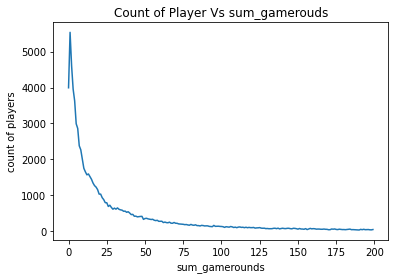

In [13]:
#Group by sum_gamerounds and count the number of users for the first 200 gamerounds
#Use plot() function on the summarized stats to visualize the chart

new_data  = user_df[["userid","sum_gamerounds"]].groupby("sum_gamerounds").count().reset_index().rename(columns = {"userid":"count"})[0:200]

plt.xlabel("sum_gamerounds")
plt.ylabel("count of players")

plt.title("Count of Player Vs sum_gamerouds")
plt.plot(new_data["sum_gamerounds"],new_data["count"])

# Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played


# Seven days retention rate summary for different game versions

In [14]:
#Create cross tab for game version and retention_7 flag counting number of users for each possible categories

pd.crosstab(user_df.version, user_df.retention_7).apply(lambda r: r/r.sum(), axis=1)

retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


In [ ]:
#Analsysis Results: There is negligible difference among the two groups. In both the case, majority of the players(~ 80%) quit the game after 7 days period.

# Gamerounds summary for different game versions

In [15]:
#use pandas group by to calculate average game rounds played summarized by different versions
user_df.groupby(['version']).agg({'sum_gamerounds': ['mean']})

,sum_gamerounds
,mean
version,
gate_30,51.342111
gate_40,51.298776


In [ ]:
#Do total number of gamerounds played in total by each player differ based on different versions of the game?

#Analsysis Results: There is not much difference in the total number of gamerounds of two different versions of the game played by each player.

# Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different


# Initial data processing

In [16]:
#Define A/B groups for hypothesis testing
#user_df["version"] = np.where(user_df.version == "gate_30", "A", "B")

user_df["version"] = user_df["version"].replace(["gate_30","gate_40"],["A","B"])

group_A=pd.DataFrame(user_df[user_df.version=="A"]['sum_gamerounds'])
group_B=pd.DataFrame(user_df[user_df.version=="B"]['sum_gamerounds'])

# Shapiro test of Normality

In [17]:
#---------------------- Shapiro Test ----------------------
# NULL Hypothesis H0: Distribution is normal
# ALTERNATE Hypothesis H1: Distribution is not normal    

#test for group_A
stats.shapiro(group_A)


#test for group_B
stats.shapiro(group_B)

ShapiroResult(statistic=0.48864424228668213, pvalue=0.0)

ShapiroResult(statistic=0.48256540298461914, pvalue=0.0)

In [ ]:
#Analyze and interpret the results of shapiro test of normality i.e. are the two groups normally distributed?

#Analsysis Results:

According to Shapiro test of Normality, Null hypothesis is rejected i.e, distribution is normal because p-value is less than 0.05. Yes Distribution is not normal H1 is accepted



# Test of homegienity of variance

In [18]:
#---------------------- Leven's Test ----------------------
# NULL Hypothesis H0: Two groups have equal variances
# ALTERNATE Hypothesis H1: Two groups do not have equal variances

#perform levene's test and accept or reject the null hypothesis based on the results

from scipy.stats import levene

levene(group_A.sum_gamerounds,group_B.sum_gamerounds)


LeveneResult(statistic=0.07510153837481241, pvalue=0.7840494387892463)

In [19]:
#Analsysis Results:

#The p-value suggests that we fail to reject the null hypothesis, group A and B both have equal vairances.

# Test of significance: Two sample test

In [20]:
#---------------------- Two samples test ----------------------

#Apply relevant two sample test to accept or reject the NULL hypothesis

# NULL Hypothesis H0: Two samples are equal
stats.mannwhitneyu(group_A.sum_gamerounds, group_B.sum_gamerounds)

# ALTERNATE Hypothesis H1: Two samples are different
stats.mannwhitneyu(group_A.sum_gamerounds, group_B.sum_gamerounds, alternative = "greater")

MannwhitneyuResult(statistic=1024285761.5, pvalue=0.05089155279145376)

MannwhitneyuResult(statistic=1024285761.5, pvalue=0.02544577639572688)

In [ ]:
#Analsysis Results:

. We have used mann-whitney u test to check the null hypothesis, whether the two groups are similar or different.

. We have repeated the mann-whitney u test with the same null hypothesis but with the alternate hypothesis being whether the first group is greater than the second group.The results make it clear that the group_A and group_B are statistically different.

# Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [21]:
#Analyze the 1 day and 7 days retention rate for two different groups using group by function

user_df[["version","retention_7","retention_1"]].groupby("version").agg("mean")

,retention_7,retention_1
version,,
A,0.190183,0.448198
B,0.182000,0.442283


In [ ]:
#Analsysis Results:

#Based on the significance test we can conclude that gate level 30 has higher retention rate.